In [1]:
dataset=[
    ['사과','치즈','생수'],
    ['생수','호두','치즈','고등어'],
    ['수박','사과','생수'],
    ['생수','호두','치즈','옥수수']
]

In [3]:
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd
#트랜잭션 자료형으로 변환
#x축 전체품목, y축 거래아이디(한장의 영수증)
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_) #데이터프레임으로 변환
df

,고등어,사과,생수,수박,옥수수,치즈,호두
0,False,True,True,False,False,True,False
1,True,False,True,False,False,True,True
2,False,True,True,True,False,False,False
3,False,False,True,False,True,True,True


In [4]:
#선험적 알고리즘 support >0.5 이상
from mlxtend.frequent_patterns import apriori
frequent_itemsets = apriori(df, min_support=0.5, use_colnames=True)
frequent_itemsets
#사과를 살 확률은 0.5
#치즈,생수를 같이 살 확률은 75%

,support,itemsets
0,0.50,(사과)
1,1.00,(생수)
2,0.75,(치즈)
3,0.50,(호두)
4,0.50,"(생수, 사과)"
5,0.75,"(치즈, 생수)"
6,0.50,"(호두, 생수)"
7,0.50,"(치즈, 호두)"
8,0.50,"(치즈, 생수, 호두)"


In [5]:
#confidence > 0.3(기본값 0.8)
from mlxtend.frequent_patterns import association_rules
rules=association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(생수),(사과),1.00,0.50,0.50,0.500000,1.000000,0.000,1.0,0.0
1,(사과),(생수),0.50,1.00,0.50,1.000000,1.000000,0.000,inf,0.0
2,(치즈),(생수),0.75,1.00,0.75,1.000000,1.000000,0.000,inf,0.0
3,(생수),(치즈),1.00,0.75,0.75,0.750000,1.000000,0.000,1.0,0.0
4,(호두),(생수),0.50,1.00,0.50,1.000000,1.000000,0.000,inf,0.0
5,(생수),(호두),1.00,0.50,0.50,0.500000,1.000000,0.000,1.0,0.0
6,(치즈),(호두),0.75,0.50,0.50,0.666667,1.333333,0.125,1.5,1.0
7,(호두),(치즈),0.50,0.75,0.50,1.000000,1.333333,0.125,inf,0.5
8,"(치즈, 생수)",(호두),0.75,0.50,0.50,0.666667,1.333333,0.125,1.5,1.0
9,"(치즈, 호두)",(생수),0.50,1.00,0.50,1.000000,1.000000,0.000,inf,0.0


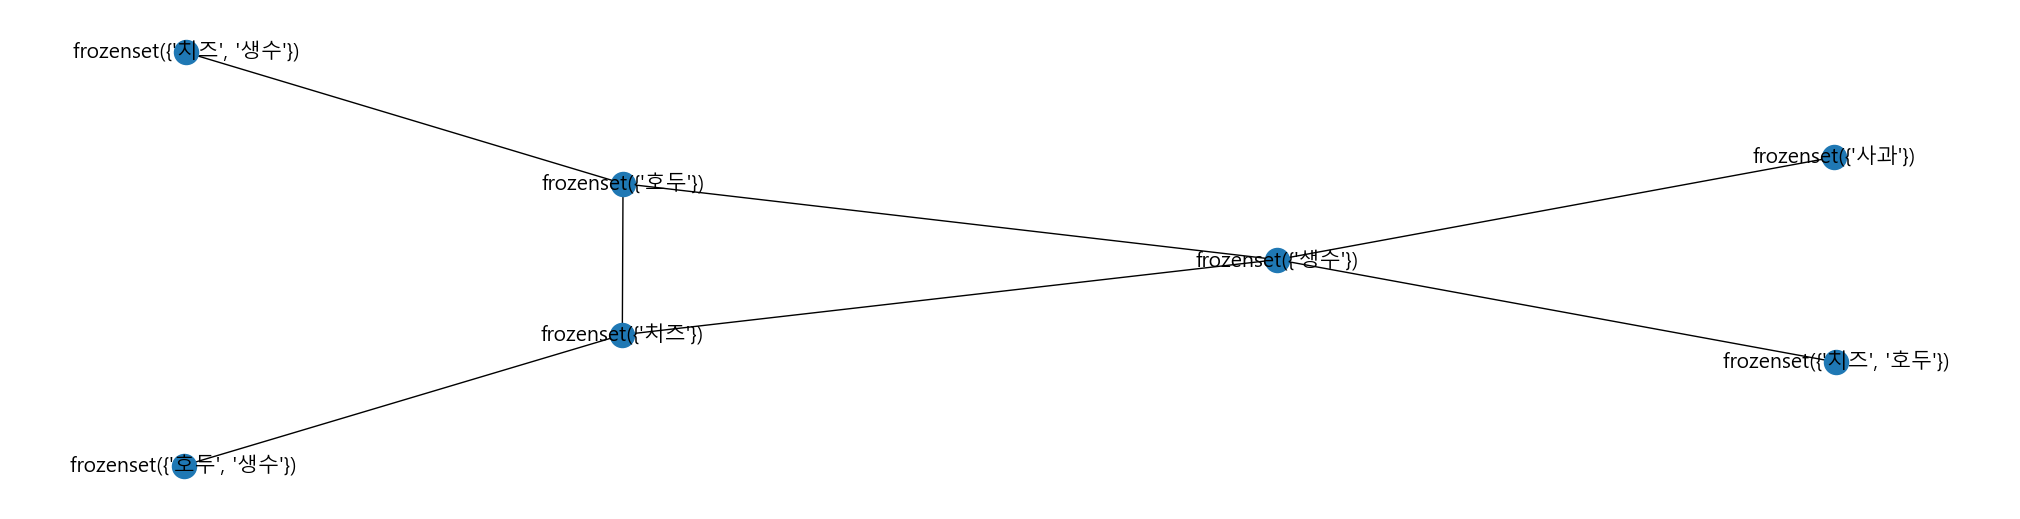

In [6]:
#pip install decorator==5.0.9
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
#한글 처리를 위해 폰트 설정
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
import networkx as nx
# antecedents 선행(~라면), consequents 결과(~이다)
ga=nx.from_pandas_edgelist(rules,source='antecedents',target='consequents')
plt.figure(figsize=(20,5))
nx.draw(ga,with_labels=True,font_family=font_name,font_size=15)
# source(그래프의 안쪽 노드들), target(그래프의 바깥쪽 노드들)